In [2]:
import numpy as np
import pandas as pd

C:\Users\USER\AppData\Local\Temp\ipykernel_7892\1662815981.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df=pd.read_csv('climate_change_impact_on_agriculture_2024.csv')
df.head()

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
0,2001,India,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,Water Management,808.13
1,2024,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22
2,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,Water Management,796.96
3,2001,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,No Adaptation,790.32
4,1998,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,Crop Rotation,401.72


In [4]:
df.isna().sum()

Year                           0
Country                        0
Region                         0
Crop_Type                      0
Average_Temperature_C          0
Total_Precipitation_mm         0
CO2_Emissions_MT               0
Crop_Yield_MT_per_HA           0
Extreme_Weather_Events         0
Irrigation_Access_%            0
Pesticide_Use_KG_per_HA        0
Fertilizer_Use_KG_per_HA       0
Soil_Health_Index              0
Adaptation_Strategies          0
Economic_Impact_Million_USD    0
dtype: int64

In [5]:
df_array = np.array(df)
df_1D = np.array(df.iloc[0])
df_2D = np.array(df.iloc[0:3])
df_3D = np.array(df.iloc[0:3,4])

In [6]:
df1 = pd.DataFrame(df.iloc[0:5].values, index=range(1,6), columns=df.columns)
df1

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
1,2001,India,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,Water Management,808.13
2,2024,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22
3,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,Water Management,796.96
4,2001,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.89,5,94.06,14.38,87.58,91.39,No Adaptation,790.32
5,1998,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.08,9,95.75,44.35,88.08,49.61,Crop Rotation,401.72


In [7]:
df.columns

Index(['Year', 'Country', 'Region', 'Crop_Type', 'Average_Temperature_C',
       'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA',
       'Extreme_Weather_Events', 'Irrigation_Access_%',
       'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA',
       'Soil_Health_Index', 'Adaptation_Strategies',
       'Economic_Impact_Million_USD'],
      dtype='object')

In [28]:
df_agg = df.groupby(['Year','Country'])[['Average_Temperature_C']].mean()
df_agg
# import matplotlib.pyplot as plt
# plt.stackplot(df_agg.index, df_agg['Average_Temperature'], labels=['Average_Temperature'])

Average_Temperature_C
Year Country                         
1990 Argentina              17.630800
     Australia              13.775185
     Brazil                 18.487647
     Canada                 18.237037
     China                  15.336452
...                               ...
2024 France                 15.131538
     India                  14.576667
     Nigeria                12.311154
     Russia                 13.786538
     USA                    14.979730

[350 rows x 1 columns]

In [29]:
import matplotlib.pyplot as plt

df_unstacked = df_agg.unstack(level='Country').fillna(0)
year = df_unstacked.index
temp_data = [df_unstacked['Average_Temperature_C', temp] for temp in df_unstacked['Average_Temperature_C'].columns]


year

Index([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
      dtype='int64', name='Year')

In [30]:
temp_data

[Year
 1990    17.630800
 1991    14.385135
 1992    17.700000
 1993    12.248421
 1994    10.687600
 1995    16.446400
 1996    17.407857
 1997    16.363667
 1998    16.620833
 1999    13.110000
 2000    14.756087
 2001    13.904074
 2002    19.022222
 2003    16.647333
 2004    13.185000
 2005    15.368065
 2006    17.270370
 2007    18.979259
 2008    13.939375
 2009    15.434815
 2010    13.614000
 2011    15.787143
 2012    16.255000
 2013    19.988000
 2014    15.624412
 2015    16.918077
 2016    13.407500
 2017    14.441562
 2018    14.135417
 2019    13.331842
 2020    16.531034
 2021    15.119333
 2022    13.172857
 2023    13.205217
 2024    16.547308
 Name: (Average_Temperature_C, Argentina), dtype: float64,
 Year
 1990    13.775185
 1991    17.066538
 1992    11.427097
 1993    16.993030
 1994    15.813824
 1995    16.397692
 1996    13.899118
 1997    16.134687
 1998    14.385769
 1999    16.494545
 2000    17.191429
 2001    17.178108
 2002    13.479048
 2003    15.77307

[]

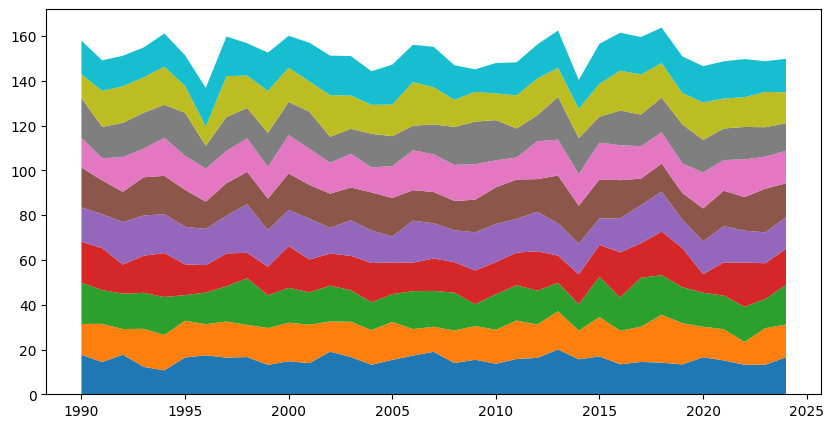

In [ ]:
plt.figure(figsize=(10,5))
plt.stackplot(year, temp_data, labels=df_unstacked['Average_Temperature_C'].columns)
plt.plot()

In [37]:
temp_data

[Year
 1990    17.630800
 1991    14.385135
 1992    17.700000
 1993    12.248421
 1994    10.687600
 1995    16.446400
 1996    17.407857
 1997    16.363667
 1998    16.620833
 1999    13.110000
 2000    14.756087
 2001    13.904074
 2002    19.022222
 2003    16.647333
 2004    13.185000
 2005    15.368065
 2006    17.270370
 2007    18.979259
 2008    13.939375
 2009    15.434815
 2010    13.614000
 2011    15.787143
 2012    16.255000
 2013    19.988000
 2014    15.624412
 2015    16.918077
 2016    13.407500
 2017    14.441562
 2018    14.135417
 2019    13.331842
 2020    16.531034
 2021    15.119333
 2022    13.172857
 2023    13.205217
 2024    16.547308
 Name: (Average_Temperature_C, Argentina), dtype: float64,
 Year
 1990    13.775185
 1991    17.066538
 1992    11.427097
 1993    16.993030
 1994    15.813824
 1995    16.397692
 1996    13.899118
 1997    16.134687
 1998    14.385769
 1999    16.494545
 2000    17.191429
 2001    17.178108
 2002    13.479048
 2003    15.77307

[]

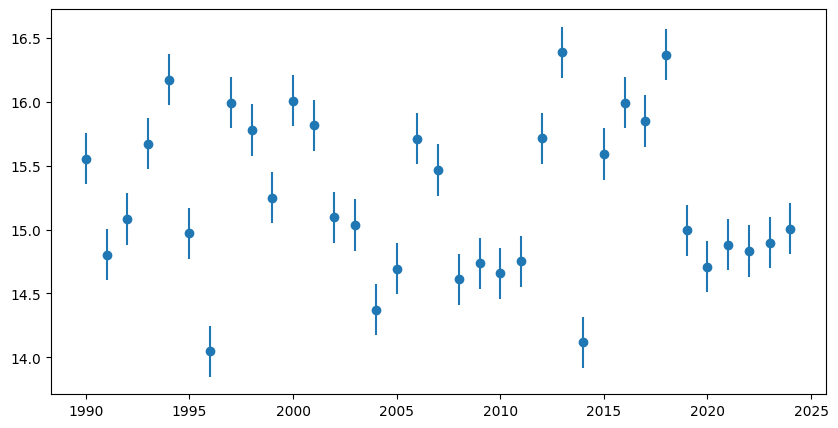

In [43]:
df_agg = df.groupby('Year')[['Average_Temperature_C']].mean()

plt.figure(figsize=(10,5))
plt.errorbar(df_agg.index, df_agg['Average_Temperature_C'], yerr=0.2, fmt='o')
plt.plot()